# Training Coastal Wetlands Forests Habitat Suitability model  


# Imports

In [3]:
from model_builder import ModelBuilder

In [4]:
import matplotlib.pyplot as plt

# Model

Initialize the model builder

In [6]:
model_builder = ModelBuilder()

# Create Dataset

We want to predict the coastal wetlands forests habitat suitability using predictors such as terrain information, proximity to water, physiography, climate information etc. 

First step is to create the dataset for the training from the csv files that contains all the samples 

In [7]:
# Response variable is the deforestation risk value
response_variable=['response']

# Predictors names that we want to use for the training
feature_names = ['elevation', 'slope', 'distance_water', 'proximity_water', 'soil_moisture_mean', 'tmax_mean',
                 'tmin_mean', 'precipitation_mean', 'physiography']

gcp_bucket = 'wetlands-lab'
gcp_folder_name = 'habitat_suitability'
samples_folder_name = ''

# Class 13+16 - Florida
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/Florida/florida_gridded_50kmx50km_classPoints_2000_2000_classes_13_16_CCAP_v2_2/florida_gridded_50kmx50km_classPoints_2000_2000_classes_13_16_CCAP.csv'

# only with class 13 - Florida
# Balanced
# name_csv_samples_merged_file ='/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/Florida/florida_gridded_50kmx50km_classPoints_2000_2000_classes_13_CCAP/florida_gridded_50kmx50km_classPoints_2000_2000_classes_13_CCAP.csv'
# 4000/2000 ratio 
# name_csv_samples_merged_file ='/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/Florida/florida_gridded_50kmx50km_classPoints_4000_2000_classes_13_CCAP/Florida_gridded_50kmx50km_classPoints_4000_2000_classes_13_CCAP.csv'
# 4000/1000 ratio 
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/Florida/florida_gridded_50kmx50km_classPoints_4000_1000_classes_13_CCAP/florida_gridded_50kmx50km_classPoints_4000_1000_classes_13_CCAP.csv'


# Class 13+16 - CCAP boundaries

# only with class 13 - CCAP boundaries
# 4000/1000 ratio 
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/CCAP_bound_buff40_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP/merged_CCAP_bound_buff40_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv'

# West Coast USA 
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/west_coast/west_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP/merged_west_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv'

# South East coast USA
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/south_east_coast/south_east_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP/merged_south_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv'

# North East coast USA
name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP/merged_north_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv'

# All USA CCAP
# name_csv_samples_merged_file = '/Users/margauxmforstyhe/Desktop/usa_CCAP_merged_samples/merged_all_USA_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv'


Create the dataset with train, test and val splits

In [8]:
model_builder.train_val_test_split(response_variable=response_variable, 
                             samples_csv_local=True,
                             feature_names=feature_names, 
                             gcp_bucket=gcp_bucket, 
                             gcp_folder_name=gcp_folder_name, 
                             samples_folder_name= samples_folder_name, 
                             name_csv_samples_merged_file = name_csv_samples_merged_file, 
                             use_test_val_buffered_sets = False,
                             test_size=0.20,
                            )


Reading sample csv file: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP/merged_north_coast_ccap_mapping_bndry_gridded_50km_50km_classPoints_4000_1000_classes_13_CCAP.csv...
We have 4436469 samples
Training samples: 3549175
Test samples: 887294
Validation samples: 0


Let's take a look at our training predictors:

In [9]:
model_builder.X_train.head()

,elevation,slope,distance_water,proximity_water,soil_moisture_mean,tmax_mean,tmin_mean,precipitation_mean,lithology,landforms,physiography
3986436,206.41975,0.391923,30.00000,715.611627,23.946846,15.612528,6.147637,3.124835,14,34,3414
3706795,180.23892,0.151461,0.00000,872.066511,22.871202,16.533571,5.910412,2.415714,14,41,4113
4320337,253.29740,2.232531,416.77332,1266.056871,23.582623,12.611319,2.046209,2.356401,10,32,2210
2544550,129.19536,0.849895,234.30749,483.735465,20.741753,19.736237,8.081182,2.633462,3,24,2403
2880978,92.03753,0.024281,0.00000,456.946386,23.213928,13.835219,2.477692,2.553407,14,41,4114


Now our training targets:

In [10]:
model_builder.y_train.head(2)

,response
3986436,1
3706795,0


In [11]:
nb_wetlands_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 0][response_variable[0]].count()
nb_not_wetlands_samples = model_builder.y_train[model_builder.y_train[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_wetlands_samples} wetlands samples and {nb_not_wetlands_samples} non-wetlands samples in training set')

nb_wetlands_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 0][response_variable[0]].count()
nb_not_wetlands_samples_test = model_builder.y_test[model_builder.y_test[response_variable[0]] == 1][response_variable[0]].count()
print(f'There are {nb_wetlands_samples_test} wetlands samples and {nb_not_wetlands_samples_test} non-wetlands samples in test set')


There are 2859900 wetlands samples and 689275 non-wetlands samples in training set
There are 714214 wetlands samples and 173080 non-wetlands samples in test set


In [12]:
model_builder.feature_names

['elevation',
 'slope',
 'distance_water',
 'proximity_water',
 'soil_moisture_mean',
 'tmax_mean',
 'tmin_mean',
 'precipitation_mean',
 'lithology',
 'landforms',
 'physiography']

In [13]:
model_builder.response_variable

['response']

In [14]:
model_builder.X_train.head(10)

,elevation,slope,distance_water,proximity_water,soil_moisture_mean,tmax_mean,tmin_mean,precipitation_mean,lithology,landforms,physiography
3986436,206.419750,0.391923,30.000000,715.611627,23.946846,15.612528,6.147637,3.124835,14,34,3414
3706795,180.238920,0.151461,0.000000,872.066511,22.871202,16.533571,5.910412,2.415714,14,41,4113
4320337,253.297400,2.232531,416.773320,1266.056871,23.582623,12.611319,2.046209,2.356401,10,32,2210
2544550,129.195360,0.849895,234.307490,483.735465,20.741753,19.736237,8.081182,2.633462,3,24,2403
2880978,92.037530,0.024281,0.000000,456.946386,23.213928,13.835219,2.477692,2.553407,14,41,4114
2030539,483.438000,1.964275,442.944692,926.120942,24.399180,10.852884,-1.299808,2.706456,11,32,3211
1713282,11.222245,0.295974,240.000000,757.165768,22.785583,21.130714,10.828544,3.935028,19,24,2419
812711,85.504920,4.252827,0.000000,1343.316791,20.208700,18.581703,8.020906,2.835962,5,42,4205
826716,112.641820,1.177330,342.052628,1636.856744,21.522285,18.417856,7.799588,3.077225,5,24,2405
4320721,295.253800,1.003853,360.000000,1440.000000,23.166048,12.414616,1.397555,2.371126,10,24,2410


# Training

In [15]:
# # # TODO
# model_builder.grid_search(n_estimators = [100, 500],
#                             max_features = ['sqrt'],
#                             max_depth = [8, None],
#                             min_samples_split = [2, 5],
#                             min_samples_leaf = [1, 2, 4],
#                             criterion=['gini'], 
#                             random_state=42)

In [17]:
# Good results are often achieved when setting max_depth=None in combination with min_samples_split=2 
# from https://scikit-learn.org/stable/modules/ensemble.html#parameters
model_builder.initialize_model(model_type='RandomForestClassifier', 
                               nb_trees=100, max_depth=None, random_state=42, 
                               criterion='gini', #'gini',
                               min_samples_split=2, min_samples_leaf=1, 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, 
                               max_features='sqrt', 
                               n_cores=-1, 
                               oob_score=True, bootstrap=True,
                               warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

In [18]:
model_builder.model

RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True,
                       random_state=42, verbose=1)

In [19]:
model_builder.train()

../model_builder.py:379: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X_train, self.y_train.values)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.3min finished


# Evaluation


Evaluation...


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   16.3s finished


R2 with predictions probabilities: 0.3454909125203326
ROC-AUC score of the model:   0.8768503825036171
Kappa score: 0.46744668961478686
Accuracy of the model: 0.8551799065473226

Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91    714214
           1       0.70      0.45      0.55    173080

    accuracy                           0.86    887294
   macro avg       0.79      0.70      0.73    887294
weighted avg       0.84      0.86      0.84    887294


Confusion matrix: 
[[680586  33628]
 [ 94870  78210]]



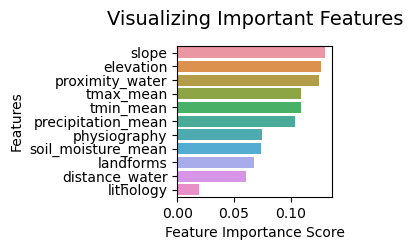

In [20]:
# On test set
model_builder.evaluate(X_data=model_builder.X_test,
                        y_data=model_builder.y_test,
                        save_figures=True, saving_base_output_name='testing_test_set',
                        feature_importance=True)


In [22]:
# from sklearn import tree

# fn=list(model_builder.X_train.columns)
# cn=['non_wetlands', 'wetlands']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
# tree.plot_tree(model_builder.model.estimators_[0],
#                feature_names=fn, 
#                class_names=cn,
#                filled = True);
# fig.savefig('rf_individualtree_0_maxdepth12.png')

# Inference on tiles

In [24]:
model_builder.inference(mask_band='elevation', 
                        tiles_folder_name='', 
                        tiles_in_GCP=False,   # Set to False to run locally
                        output_merged_tif='pred_north_east_coast_local_model.tif',
                        output_folder_temp='local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None',
                        path_to_tiles_local='/Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30'
                       )



There are 933 inference tiles

Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_379.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_30_0.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_351.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_37_1.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_52.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_43_2.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_437.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_43_3.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_423.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_43_4.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_345.tif
Image opened
Class prediction was successful wi

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_45_6.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_91.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_45_7.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_392.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_50_8.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_85.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_01_54_9.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_386.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_00_10.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_609.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_01_11.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_635.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_05_12.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_153.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_10_13.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_147.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_12_14.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_621.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_17_15.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_812.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_17_16.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_806.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_23_17.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_190.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_23_18.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_184.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_29_19.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_769.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_29_20.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_741.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_32_21.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_755.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_36_22.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_782.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_40_23.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_796.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_41_24.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_219.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_45_25.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_225.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_51_26.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_543.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_51_27.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_8.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_56_28.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_557.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_58_29.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_231.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_02_58_30.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_580.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_03_31.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_594.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_03_32.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_595.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_07_33.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_581.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_10_34.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_556.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_11_35.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_230.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_15_36.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_224.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_20_37.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_9.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_24_38.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_542.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_28_39.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_218.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_34_40.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_797.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_34_41.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_783.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_39_42.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_754.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_43_43.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_740.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_46_44.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_768.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_50_45.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_185.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_51_46.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_191.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_52_47.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_807.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_53_48.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_813.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_54_49.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_146.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_03_58_50.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_620.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_02_51.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_634.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_02_52.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_152.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_07_53.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_608.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_09_54.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_387.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_10_55.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_84.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_11_56.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_393.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_15_57.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_90.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_20_58.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_422.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_24_59.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_47.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_25_60.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_344.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_30_61.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_53.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_36_62.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_350.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_42_63.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_436.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_45_64.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_378.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_51_65.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_79.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_53_66.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_408.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_59_67.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_346.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_04_59_68.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_45.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_05_69.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_420.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_08_70.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_434.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_12_71.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_352.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_17_72.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_51.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_23_73.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_86.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_25_74.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_385.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_29_75.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_92.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_34_76.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_391.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_36_77.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_178.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_42_78.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_622.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_42_79.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_144.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_44_80.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_150.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_49_81.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_636.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_53_82.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_805.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_05_58_83.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_811.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_03_84.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_839.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_08_85.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_187.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_13_86.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_193.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_19_87.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_756.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_22_88.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_742.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_22_89.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_795.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_29_90.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_781.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_33_91.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_568.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_39_92.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_232.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_42_93.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_554.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_46_94.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_540.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_47_95.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_226.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_52_96.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_597.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_06_55_97.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_583.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_01_98.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_582.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_06_99.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_596.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_11_100.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_541.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_13_101.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_227.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_21_102.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_233.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_26_103.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_555.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_29_104.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_569.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_30_105.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_780.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_34_106.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_794.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_40_107.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_743.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_43_108.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_757.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_47_109.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_192.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_51_110.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_838.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_56_111.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_186.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_07_57_112.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_810.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_01_113.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_804.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_06_114.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_151.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_10_115.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_637.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_14_116.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_623.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_19_117.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_145.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_23_118.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_179.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_28_119.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_390.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_33_120.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_93.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_38_121.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_384.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_41_122.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_87.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_46_123.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_435.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_49_124.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_50.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_53_125.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_353.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_08_55_126.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_44.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_00_127.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_347.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_01_128.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_421.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_04_129.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_409.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_10_130.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_78.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_13_131.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_425.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_18_132.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_343.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_22_133.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_40.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_26_134.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_357.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_29_135.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_54.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_34_136.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_431.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_37_137.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_419.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_42_138.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_68.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_44_139.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_83.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_44_140.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_380.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_45_141.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_97.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_49_142.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_394.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_53_143.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_141.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_09_58_144.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_627.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_03_145.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_633.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_07_146.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_155.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_12_147.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_169.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_13_148.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_182.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_15_149.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_828.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_21_150.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_196.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_21_151.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_800.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_25_152.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_814.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_32_153.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_753.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_33_154.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_747.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_34_155.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_790.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_39_156.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_784.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_40_157.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_551.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_41_158.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_237.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_45_159.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_223.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_46_160.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_545.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_47_161.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_579.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_51_162.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_592.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_54_163.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_586.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_57_164.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_587.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_57_165.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_593.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_58_166.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_578.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_10_58_167.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_222.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_02_168.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_544.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_02_169.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_550.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_02_170.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_236.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_04_171.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_785.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_08_172.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_791.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_12_173.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_746.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_16_174.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_752.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_19_175.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_815.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_24_176.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_801.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_28_177.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_829.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_33_178.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_197.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_40_179.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_183.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_50_180.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_168.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_11_51_181.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_632.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_00_182.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_154.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_05_183.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_140.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_12_184.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_626.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_17_185.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_395.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_22_186.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_96.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_26_187.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_381.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_32_188.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_82.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_32_189.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_69.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_37_190.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_418.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_43_191.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_55.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_46_192.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_356.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_49_193.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_430.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_53_194.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_424.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_12_58_195.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_41.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_04_196.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_342.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_09_197.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_432.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_13_198.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_354.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_22_199.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_57.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_31_200.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_340.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_37_201.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_43.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_39_202.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_426.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_42_203.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_368.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_44_204.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_94.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_50_205.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_397.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_54_206.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_80.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_13_57_207.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_383.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_02_208.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_156.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_03_209.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_630.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_08_210.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_624.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_11_211.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_142.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_15_212.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_618.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_22_213.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_195.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_23_214.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_181.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_30_215.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_817.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_37_216.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_803.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_39_217.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_744.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_41_218.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_750.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_45_219.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_778.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_51_220.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_787.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_56_221.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_793.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_14_59_222.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_546.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_01_223.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_220.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_05_224.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_234.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_06_225.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_552.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_07_226.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_208.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_14_227.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_585.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_14_228.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_591.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_17_229.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_590.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_20_230.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_584.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_21_231.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_209.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_30_232.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_235.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_36_233.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_553.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_38_234.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_547.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_40_235.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_221.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_46_236.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_792.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_51_237.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_786.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_54_238.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_779.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_15_59_239.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_751.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_01_240.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_745.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_03_241.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_802.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_08_242.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_816.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_11_243.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_180.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_17_244.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_194.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_18_245.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_619.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_21_246.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_625.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_24_247.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_143.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_28_248.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_157.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_34_249.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_631.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_39_250.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_382.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_44_251.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_81.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_44_252.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_396.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_51_253.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_95.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_56_254.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_369.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_16_58_255.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_42.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_05_256.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_341.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_11_257.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_427.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_14_258.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_433.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_16_259.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_56.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_21_260.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_355.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_26_261.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_468.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_28_262.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_19.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_33_263.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_454.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_35_264.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_332.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_37_265.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_31.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_40_266.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_326.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_45_267.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_25.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_48_268.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_440.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_48_269.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_497.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_54_270.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_483.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_56_271.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_118.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_17_58_272.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_130.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_00_273.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_656.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_06_274.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_642.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_12_275.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_124.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_13_276.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_871.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_18_277.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_865.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_23_278.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_695.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_29_279.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_859.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_34_280.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_681.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_35_281.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_722.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_40_282.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_736.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_42_283.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_905.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_46_284.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_911.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_47_285.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_508.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_54_286.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_520.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_18_56_287.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_246.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_01_288.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_252.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_07_289.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_534.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_10_290.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_285.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_12_291.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_291.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_18_292.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_290.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_18_293.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_284.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_22_294.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_253.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_24_295.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_535.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_28_296.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_521.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_35_297.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_247.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_40_298.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_509.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_46_299.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_910.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_49_300.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_904.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_53_301.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_737.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_19_59_302.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_723.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_02_303.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_680.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_08_304.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_858.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_10_305.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_694.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_16_306.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_864.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_17_307.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_870.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_19_308.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_643.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_26_309.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_125.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_26_310.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_131.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_28_311.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_657.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_34_312.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_119.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_34_313.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_482.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_39_314.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_496.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_45_315.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_24.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_51_316.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_327.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_55_317.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_441.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_20_56_318.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_455.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_00_319.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_30.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_06_320.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_333.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_10_321.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_18.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_15_322.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_469.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_18_323.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_319.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_22_324.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_443.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_25_325.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_325.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_30_326.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_26.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_36_327.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_331.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_41_328.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_32.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_45_329.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_457.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_50_330.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_480.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_21_54_331.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_494.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_00_332.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_669.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_06_333.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_127.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_08_334.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_641.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_13_335.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_899.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_17_336.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_655.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_23_337.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_133.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_23_338.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_866.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_24_339.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_872.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_28_340.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_682.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_34_341.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_696.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_34_342.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_709.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_35_343.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_735.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_40_344.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_721.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_41_345.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_912.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_43_346.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_906.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_48_347.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_279.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_52_348.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_537.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_22_57_349.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_251.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_02_350.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_245.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_06_351.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_523.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_11_352.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_292.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_14_353.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_286.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_18_354.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_287.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_18_355.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_293.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_21_356.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_244.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_21_357.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_522.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_27_358.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_536.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_31_359.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_250.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_32_360.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_278.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_35_361.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_907.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_37_362.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_913.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_39_363.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_720.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_41_364.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_734.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_45_365.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_708.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_46_366.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_697.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_53_367.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_683.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_54_368.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_873.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_58_369.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_867.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_59_370.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_654.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_23_59_371.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_132.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_03_372.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_126.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_04_373.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_898.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_04_374.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_640.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_08_375.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_668.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_15_376.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_495.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_20_377.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_481.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_26_378.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_33.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_31_379.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_330.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_37_380.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_456.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_41_381.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_442.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_46_382.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_27.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_51_383.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_324.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_24_57_384.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_318.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_02_385.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_320.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_07_386.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_23.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_12_387.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_446.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_13_388.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_452.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_16_389.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_334.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_17_390.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_37.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_20_391.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_308.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_20_392.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_485.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_26_393.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_491.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_33_394.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_644.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_34_395.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_122.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_34_396.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_136.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_39_397.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_650.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_45_398.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_888.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_48_399.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_678.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_54_400.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_687.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_25_56_401.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_693.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_02_402.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_863.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_07_403.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_877.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_12_404.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_730.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_16_405.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_724.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_18_406.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_718.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_22_407.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_917.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_26_408.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_903.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_27_409.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_254.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_32_410.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_532.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_39_411.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_526.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_44_412.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_240.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_48_413.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_268.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_54_414.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_297.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_26_58_415.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_283.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_02_416.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_282.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_06_417.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_296.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_10_418.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_269.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_14_419.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_527.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_20_420.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_241.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_25_421.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_255.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_25_422.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_533.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_32_423.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_902.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_35_424.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_916.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_40_425.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_719.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_45_426.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_725.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_47_427.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_731.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_53_428.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_876.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_27_58_429.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_862.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_04_430.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_692.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_09_431.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_686.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_15_432.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_679.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_22_433.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_137.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_26_434.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_889.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_27_435.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_651.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_32_436.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_645.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_38_437.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_123.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_39_438.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_490.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_44_439.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_484.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_49_440.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_309.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_52_441.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_453.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_55_442.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_36.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_28_58_443.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_335.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_04_444.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_22.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_10_445.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_321.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_14_446.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_447.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_18_447.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_337.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_24_448.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_34.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_29_449.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_451.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_34_450.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_445.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_38_451.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_323.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_42_452.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_20.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_47_453.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_479.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_53_454.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_492.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_29_57_455.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_486.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_02_456.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_653.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_07_457.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_135.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_11_458.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_121.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_13_459.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_647.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_15_460.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_109.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_18_461.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_848.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_26_462.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_690.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_33_463.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_684.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_40_464.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_874.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_45_465.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_860.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_52_466.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_727.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_55_467.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_733.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_58_468.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_928.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_30_59_469.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_900.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_03_470.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_914.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_07_471.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_243.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_10_472.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_525.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_16_473.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_531.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_22_474.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_257.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_28_475.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_519.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_34_476.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_280.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_34_477.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_294.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_39_478.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_295.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_44_479.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_281.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_46_480.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_518.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_47_481.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_530.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_53_482.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_256.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_57_483.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_242.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_31_59_484.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_524.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_04_485.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_915.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_07_486.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_901.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_11_487.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_929.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_17_488.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_732.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_22_489.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_726.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_25_490.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_861.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_30_491.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_875.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_30_492.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_685.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_36_493.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_691.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_37_494.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_849.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_44_495.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_108.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_47_496.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_120.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_49_497.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_646.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_54_498.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_652.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_32_59_499.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_134.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_02_500.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_487.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_07_501.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_493.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_10_502.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_478.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_14_503.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_444.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_17_504.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_21.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_18_505.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_322.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_23_506.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_35.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_28_507.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_336.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_34_508.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_450.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_38_509.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_449.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_39_510.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_38.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_44_511.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_475.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_49_512.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_313.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_49_513.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_10.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_51_514.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_307.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_51_515.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_461.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_55_516.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_893.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_55_517.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_887.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_33_57_518.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_139.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_01_519.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_111.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_01_520.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_677.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_07_521.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_663.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_08_522.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_105.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_11_523.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_850.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_12_524.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_688.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_17_525.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_844.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_17_526.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_878.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_23_527.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_703.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_26_528.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_717.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_29_529.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_924.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_34_530.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_930.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_37_531.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_918.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_38_532.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_529.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_41_533.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_501.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_41_534.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_267.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_45_535.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_273.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_47_536.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_515.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_48_537.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_298.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_48_538.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_299.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_53_539.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_272.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_34_57_540.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_514.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_03_541.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_500.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_09_542.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_266.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_14_543.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_528.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_17_544.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_919.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_22_545.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_931.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_27_546.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_925.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_32_547.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_716.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_37_548.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_702.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_37_549.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_879.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_42_550.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_845.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_45_551.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_689.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_53_552.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_851.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_35_58_553.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_662.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_03_554.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_104.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_09_555.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_110.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_11_556.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_676.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_11_557.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_886.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_16_558.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_138.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_21_559.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_892.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_25_560.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_306.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_25_561.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_460.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_30_562.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_474.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_31_563.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_11.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_35_564.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_312.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_40_565.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_39.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_45_566.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_448.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_49_567.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_338.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_36_55_568.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_462.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_01_569.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_304.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_06_570.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_310.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_11_571.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_13.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_13_572.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_476.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_17_573.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_489.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_22_574.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_884.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_22_575.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_648.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_27_576.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_890.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_28_577.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_106.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_28_578.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_660.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_33_579.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_674.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_35_580.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_112.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_38_581.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_847.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_43_582.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_853.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_49_583.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_728.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_54_584.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_714.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_37_54_585.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_700.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_01_586.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_927.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_07_587.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_258.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_12_588.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_516.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_19_589.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_270.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_21_590.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_264.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_26_591.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_502.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_32_592.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_265.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_38_593.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_503.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_38_594.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_517.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_44_595.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_271.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_48_596.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_259.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_53_597.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_926.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_38_58_598.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_932.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_03_599.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_701.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_06_600.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_715.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_11_601.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_729.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_16_602.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_852.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_22_603.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_846.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_30_604.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_675.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_31_605.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_113.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_35_606.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_107.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_38_607.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_661.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_43_608.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_891.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_47_609.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_649.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_50_610.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_885.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_39_55_611.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_488.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_01_612.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_12.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_06_613.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_311.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_11_614.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_477.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_16_615.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_463.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_17_616.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_305.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_19_617.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_339.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_21_618.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_301.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_23_619.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_467.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_25_620.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_473.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_26_621.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_315.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_28_622.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_16.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_33_623.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_329.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_38_624.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_498.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_38_625.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_665.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_45_626.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_103.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_49_627.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_117.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_52_628.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_671.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_40_57_629.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_659.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_03_630.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_881.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_04_631.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_895.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_08_632.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_842.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_14_633.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_856.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_20_634.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_711.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_24_635.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_705.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_27_636.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_739.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_30_637.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_922.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_34_638.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_275.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_37_639.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_513.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_40_640.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_507.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_47_641.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_261.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_48_642.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_249.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_51_643.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_248.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_41_57_644.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_506.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_03_645.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_260.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_08_646.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_274.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_12_647.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_512.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_12_648.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_923.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_17_649.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_738.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_22_650.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_704.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_25_651.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_710.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_27_652.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_857.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_27_653.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_843.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_35_654.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_894.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_39_655.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_880.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_43_656.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_658.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_48_657.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_116.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_48_658.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_670.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_42_54_659.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_664.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_01_660.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_102.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_01_661.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_499.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_06_662.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_328.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_07_663.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_472.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_11_664.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_17.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_16_665.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_314.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_22_666.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_300.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_24_667.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_466.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_29_668.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_316.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_34_669.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_15.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_38_670.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_470.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_43_671.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_464.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_48_672.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_302.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_49_673.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_29.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_49_674.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_458.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_51_675.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_672.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_43_57_676.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_114.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_00_677.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_100.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_06_678.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_666.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_10_679.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_896.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_13_680.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_128.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_13_681.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_882.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_20_682.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_869.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_21_683.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_855.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_27_684.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_841.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_33_685.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_699.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_39_686.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_706.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_42_687.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_712.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_44_688.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_909.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_46_689.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_921.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_50_690.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_262.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_55_691.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_504.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_44_59_692.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_510.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_04_693.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_276.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_07_694.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_538.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_11_695.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_289.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_17_696.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_288.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_21_697.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_539.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_26_698.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_511.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_27_699.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_277.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_28_700.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_263.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_28_701.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_505.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_32_702.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_920.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_37_703.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_908.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_39_704.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_713.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_43_705.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_707.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_45_706.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_698.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_50_707.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_840.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_56_708.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_854.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_58_709.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_868.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_45_59_710.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_883.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_04_711.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_897.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_08_712.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_129.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_10_713.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_101.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_16_714.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_667.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_19_715.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_673.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_19_716.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_115.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_19_717.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_459.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_24_718.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_28.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_30_719.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_465.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_33_720.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_303.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_35_721.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_14.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_36_722.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_317.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_41_723.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_471.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_45_724.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_358.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_49_725.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_370.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_54_726.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_73.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_46_59_727.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_416.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_01_728.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_402.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_02_729.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_364.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_08_730.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_67.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_10_731.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_98.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_15_732.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_628.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_20_733.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_614.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_22_734.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_172.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_27_735.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_166.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_32_736.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_600.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_36_737.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_833.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_42_738.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_199.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_50_739.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_827.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_57_740.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_748.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_47_57_741.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_760.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_02_742.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_774.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_02_743.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_238.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_03_744.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_1.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_04_745.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_204.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_11_746.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_562.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_15_747.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_576.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_22_748.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_210.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_28_749.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_589.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_31_750.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_588.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_32_751.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_577.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_37_752.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_211.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_41_753.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_205.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_42_754.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_563.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_47_755.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_0.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_48_756.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_239.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_49_757.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_775.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_54_758.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_761.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_55_759.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_749.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_48_58_760.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_198.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_02_761.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_826.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_06_762.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_832.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_12_763.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_167.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_17_764.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_601.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_22_765.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_615.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_26_766.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_173.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_28_767.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_629.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_31_768.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_99.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_31_769.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_403.tif
Image opened
Class prediction was successful

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_37_771.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_365.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_42_772.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_72.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_48_773.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_371.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_51_774.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_417.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_55_775.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_359.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_49_59_776.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_58.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_04_777.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_429.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_09_778.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_367.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_14_779.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_64.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_20_780.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_401.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_25_781.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_415.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_29_782.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_373.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_36_783.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_70.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_42_784.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_398.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_47_785.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_159.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_52_786.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_603.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_56_787.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_165.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_50_58_788.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_171.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_03_789.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_617.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_08_790.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_824.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_12_791.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_830.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_12_792.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_818.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_16_793.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_777.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_21_794.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_763.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_24_795.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_788.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_30_796.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_549.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_35_797.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_2.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_41_798.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_213.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_48_799.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_575.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_49_800.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_561.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_51_53_801.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_207.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_00_802.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_560.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_01_803.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_206.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_08_804.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_212.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_14_805.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_574.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_15_806.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_3.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_18_807.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_548.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_19_808.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_789.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_24_809.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_762.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_27_810.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_776.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_31_811.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_819.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_37_812.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_831.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_43_813.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_825.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_44_814.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_170.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_50_815.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_616.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_56_816.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_602.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_52_58_817.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_164.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_03_818.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_158.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_07_819.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_399.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_11_820.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_414.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_11_821.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_71.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_16_822.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_372.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_24_823.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_65.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_28_824.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_366.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_34_825.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_400.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_39_826.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_428.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_46_827.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_59.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_54_828.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_404.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_53_59_829.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_362.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_07_830.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_61.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_08_831.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_376.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_09_832.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_75.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_10_833.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_410.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_16_834.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_438.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_19_835.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_49.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_24_836.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_389.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_29_837.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_160.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_32_838.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_606.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_35_839.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_612.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_39_840.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_174.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_45_841.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_148.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_47_842.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_809.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_52_843.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_821.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_54_844.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_835.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_54_845.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_772.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_54_59_846.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_766.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_00_847.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_799.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_02_848.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_570.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_09_849.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_216.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_11_850.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_202.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_18_851.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_564.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_22_852.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_7.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_24_853.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_558.tif
Image opened


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_25_854.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_559.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_29_855.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_6.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_36_856.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_203.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   17.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_56_857.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_565.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_55_58_858.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_571.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   13.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_56_13_859.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_217.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_56_25_860.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_798.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_56_38_861.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_767.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_56_48_862.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_773.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_56_58_863.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_834.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   15.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_57_16_864.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_820.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_57_27_865.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_808.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    6.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   19.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_57_49_866.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_149.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_58_00_867.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_613.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   15.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_58_17_868.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_175.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_58_31_869.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_161.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_58_45_870.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_607.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_58_57_871.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_388.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_09_872.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_48.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   13.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_25_873.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_439.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    1.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_27_874.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_74.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   11.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_40_875.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_377.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_48_876.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_411.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-08_59_59_877.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_405.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    6.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   18.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_00_19_878.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_60.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   15.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_00_37_879.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_363.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   20.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_00_880.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_413.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_12_881.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_375.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_21_882.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_76.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_25_883.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_361.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_26_884.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_62.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   13.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_41_885.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_407.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_01_47_886.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_349.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   16.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_02_05_887.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_89.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.8s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_02_18_888.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_177.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_02_18_889.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_611.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   13.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_02_32_890.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_605.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_02_42_891.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_163.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   16.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_03_00_892.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_639.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   11.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_03_13_893.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_188.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   11.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_03_28_894.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_836.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_03_38_895.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_822.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    7.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   18.2s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_03_58_896.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_765.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_08_897.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_771.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_09_898.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_759.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_22_899.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_567.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_22_900.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_201.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    6.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_30_901.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_215.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   14.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_47_902.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_573.tif
Image opened
Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_47_903.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_229.tif


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_04_59_904.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_4.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   15.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_17_905.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_598.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_29_906.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_599.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_34_907.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_228.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_36_908.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_5.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.1s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_39_909.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_214.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_05_52_910.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_572.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_06_07_911.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_566.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   14.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_06_23_912.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_200.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   10.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_06_35_913.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_758.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_06_38_914.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_770.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.5s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_06_51_915.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_764.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_01_916.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_823.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   13.3s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_16_917.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_189.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.9s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   16.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_35_918.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_837.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    9.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_46_919.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_638.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_47_920.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_604.tif
Image opened


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_48_921.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_162.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_07_58_922.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_176.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   14.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_08_14_923.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_610.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.7s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   18.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_08_34_924.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_88.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    7.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_08_43_925.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_348.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_08_44_926.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_63.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   11.6s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_08_57_927.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_360.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    5.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_09_04_928.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_406.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.7s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_09_05_929.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_412.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:   12.0s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_09_19_930.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_77.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    3.9s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_09_24_931.tif




Starting image: /Users/margauxmforstyhe/Desktop/workspace/wetlands_labs/CCAP boundaries/north_east_coast/tiles_north_east_coast_ccap_mapping_bndry_gridded_50km_50km_classes_13_CCAP_scale30/inference_tiles_scale30_374.tif
Image opened


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    4.4s finished


Class prediction was successful without slicing!
No slicing was necessary!
Image saved to: local_model_outputs_classifier_prob_habitat_suitability_CCAP_NORTH_east_coast_USA_13_4000_1000_all_predictors_depth_None/output_2023-08-04-09_09_30_932.tif



Done: 933 tiles predicted
There are 933 prediction rasters to be merged.
Done.
